1. Select glaciers which area larger than specific value 


In [6]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union


### 1. select glaciers in the HMA region.

In [7]:
path_rgi70_13 = 'data/glaciers/rgi70/RGI2000-v7.0-G-13_central_asia.gpkg'   ## Cental Asia
path_rgi70_14 = 'data/glaciers/rgi70/RGI2000-v7.0-G-14_south_asia_west.gpkg'   ## South Asia (West)
path_rgi70_15 = 'data/glaciers/rgi70/RGI2000-v7.0-G-15_south_asia_east.gpkg'   ## South Asia (East)
path_rgi70_hma_larger2 = 'data/glaciers/rgi70/rgi70_hma_larger2.gpkg'


In [8]:
## Read data
rgi70_13 = gpd.read_file(path_rgi70_13)
rgi70_14 = gpd.read_file(path_rgi70_14)
rgi70_15 = gpd.read_file(path_rgi70_15)
rgi70_hma = pd.concat([rgi70_13 , rgi70_14, rgi70_15])
print(rgi70_hma.shape)
rgi70_hma.head(5)


(131762, 29)


,rgi_id,o1region,o2region,glims_id,anlys_id,subm_id,src_date,cenlon,cenlat,utm_zone,...,zmin_m,zmax_m,zmed_m,zmean_m,slope_deg,aspect_deg,aspect_sec,dem_source,lmax_m,geometry
0,RGI2000-v7.0-G-13-00001,13,13-01,G067426E38743N,804440,752,2002-07-10T00:00:00,67.425881,38.743313,42,...,3693.8557,3783.9656,3727.2417,3728.6082,34.003925,26.572540,2,COPDEM30,151,"MULTIPOLYGON Z (((67.42669 38.74384 0.00000, 6..."
1,RGI2000-v7.0-G-13-00002,13,13-01,G067480E38714N,804446,752,2002-07-10T00:00:00,67.479616,38.714583,42,...,3839.7866,3899.8672,3873.0503,3870.6500,29.506857,344.175386,1,COPDEM30,181,"MULTIPOLYGON Z (((67.48079 38.71486 0.00000, 6..."
2,RGI2000-v7.0-G-13-00003,13,13-01,G067485E38713N,804448,752,2002-07-10T00:00:00,67.484971,38.713429,42,...,3844.8918,3897.4000,3862.3850,3864.6162,24.497180,357.817919,1,COPDEM30,107,"MULTIPOLYGON Z (((67.48515 38.71390 0.00000, 6..."
3,RGI2000-v7.0-G-13-00004,13,13-01,G067489E38714N,804451,752,2002-07-10T00:00:00,67.489409,38.714494,42,...,3707.8765,3772.5522,3734.0590,3735.8280,22.809898,18.290150,1,COPDEM30,181,"MULTIPOLYGON Z (((67.49037 38.71518 0.00000, 6..."
4,RGI2000-v7.0-G-13-00005,13,13-01,G067492E38714N,804453,752,2002-07-10T00:00:00,67.491937,38.713707,42,...,3750.3887,3957.7310,3809.6294,3825.5000,44.841938,333.275023,8,COPDEM30,236,"MULTIPOLYGON Z (((67.49028 38.71390 0.00000, 6..."


In [12]:
### Select the glaciers which area larger than a specific value
rgi70_hma_larger2 = rgi70_hma.loc[rgi70_hma['area_km2'] > 2]
print(rgi70_hma_larger2.shape)
rgi70_hma_larger2.head()


(8011, 29)


,rgi_id,o1region,o2region,glims_id,anlys_id,subm_id,src_date,cenlon,cenlat,utm_zone,...,zmin_m,zmax_m,zmed_m,zmean_m,slope_deg,aspect_deg,aspect_sec,dem_source,lmax_m,geometry
247,RGI2000-v7.0-G-13-00248,13,13-01,G068125E39075N,804889,752,2002-07-10T00:00:00,68.126015,39.073924,42,...,3396.5350,4826.1430,4072.9604,4051.1255,21.975628,328.901207,8,COPDEM30,3833,"MULTIPOLYGON Z (((68.11814 39.07499 0.00000, 6..."
357,RGI2000-v7.0-G-13-00358,13,13-01,G068341E39155N,805183,752,2002-07-10T00:00:00,68.344637,39.153419,42,...,2924.3290,4997.7437,3693.7817,3789.8909,27.677057,17.711071,1,COPDEM30,4338,"MULTIPOLYGON Z (((68.32432 39.15742 0.00000, 6..."
657,RGI2000-v7.0-G-13-00658,13,13-01,G068548E39007N,805349,752,2002-07-10T00:00:00,68.544901,39.011764,42,...,3688.8770,4545.5015,4271.5710,4220.5674,14.950426,0.901747,1,COPDEM30,3938,"MULTIPOLYGON Z (((68.54119 39.01772 0.00000, 6..."
664,RGI2000-v7.0-G-13-00665,13,13-01,G068515E38986N,805309,752,2002-07-10T00:00:00,68.518540,38.992543,42,...,3554.7880,4626.9033,4227.7150,4148.2540,13.272863,1.475079,1,COPDEM30,5184,"MULTIPOLYGON Z (((68.50435 38.97702 0.00000, 6..."
1065,RGI2000-v7.0-G-13-01066,13,13-01,G069044E39009N,805743,752,2002-07-10T00:00:00,69.057885,39.006787,42,...,3548.1445,4303.6230,4019.7080,3980.0396,18.522732,7.201520,1,COPDEM30,2722,"MULTIPOLYGON Z (((69.05865 39.00008 0.00000, 6..."


In [13]:
print(f'Number of the glaciers: {rgi70_hma.shape[0]}')
print(f'Area of the glaciers: {rgi70_hma.area.sum()}')
print(f'Number of the selected glaciers: {rgi70_hma_larger2.shape[0]}')
print(f'Area of the selected glaciers: {rgi70_hma_larger2.area.sum()}')


Number of the glaciers: 131762
Area of the glaciers: 9.906035338133313
Number of the selected glaciers: 8011
Area of the selected glaciers: 6.391121081430328


<Axes: >

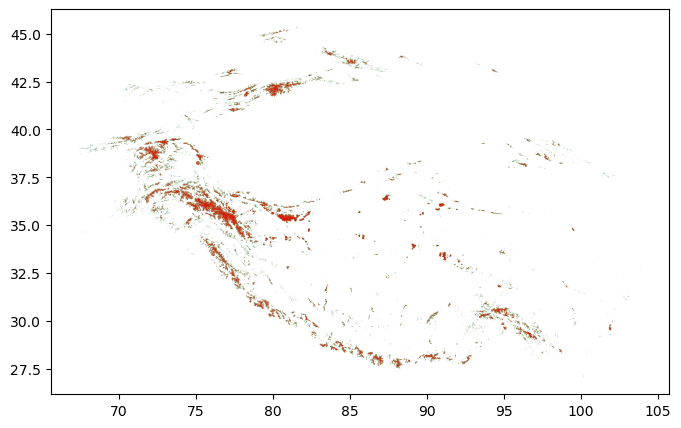

In [14]:
### Visualization
fig, ax = plt.subplots(1,1, figsize=(8,5))
rgi70_hma.plot(color='green', edgecolor='none', ax = ax)
rgi70_hma_larger2.plot(ax=ax, color='red', edgecolor='none')


In [ ]:
### Write out
# rgi70_hma_larger2.to_file(path_rgi70_hma_larger2, driver='GPKG')
